In [1]:
#importing packages
import numpy as np
import casadi as cs
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math
import csv

In [2]:
#importing dataset
df=pd.read_csv("Test_Signal_Data.csv")
df=df[['Tr','Current','Fc']]
tr=df.Tr
cur=df.Current
fc=df.Fc
scaler=StandardScaler()
scaler=scaler.fit(df)
df_scaled=scaler.transform(df)
# df_scaled=np.array(df_scaled)
print (df_scaled)

[[-2.40940966  0.25069097  0.25069097]
 [-2.45444855  0.25069097  0.25069097]
 [-2.41222459  0.25069097  0.25069097]
 ...
 [-0.23909803 -1.28373006 -1.28373006]
 [-0.2728772  -1.28373006 -1.28373006]
 [-0.26724734 -1.28373006 -1.28373006]]


In [3]:
#reshaping the dataset
trainX = []
trainY = []

n=1 #no of data points to predict in the future 
N=15 #no of past datapoints to use to predict the future

for i in range(N, len(df_scaled) - n + 1):
    trainX.append(df_scaled[i-N:i,0:df.shape[1]])
    trainY.append(df_scaled[i+n-1:i+n,0])
    
trainX=np.array(trainX)
trainY=np.array(trainY)
print('trainX shape=={}.'.format(trainX.shape))
print('trainY shape=={}.'.format(trainY.shape))

trainX shape==(10285, 15, 3).
trainY shape==(10285, 1).


In [4]:
#splitting the dataset into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size=0.20,random_state=0,shuffle= False)

In [5]:
#modelling 
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dense(Y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4608      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 12961 (50.63 KB)
Trainable params: 12961 (50.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
#fitting of model
history = model.fit(x=X_train, y=Y_train, epochs=20, batch_size = 32,validation_data= (X_test,Y_test))

Epoch 1/20
258/258 [==============================] - 6s 14ms/step - loss: 0.0949 - val_loss: 0.0020
Epoch 2/20
258/258 [==============================] - 4s 14ms/step - loss: 8.2463e-04 - val_loss: 0.0013
Epoch 3/20
258/258 [==============================] - 3s 12ms/step - loss: 7.5889e-04 - val_loss: 0.0013
Epoch 4/20
258/258 [==============================] - 3s 13ms/step - loss: 7.8442e-04 - val_loss: 7.2587e-04
Epoch 5/20
258/258 [==============================] - 3s 12ms/step - loss: 8.5856e-04 - val_loss: 0.0018
Epoch 6/20
258/258 [==============================] - 4s 16ms/step - loss: 7.1835e-04 - val_loss: 0.0018
Epoch 7/20
258/258 [==============================] - 4s 16ms/step - loss: 9.4554e-04 - val_loss: 0.0023
Epoch 8/20
258/258 [==============================] - 5s 18ms/step - loss: 8.0739e-04 - val_loss: 8.1442e-04
Epoch 9/20
258/258 [==============================] - 5s 19ms/step - loss: 8.5865e-04 - val_loss: 0.0012
Epoch 10/20
258/258 [==============================

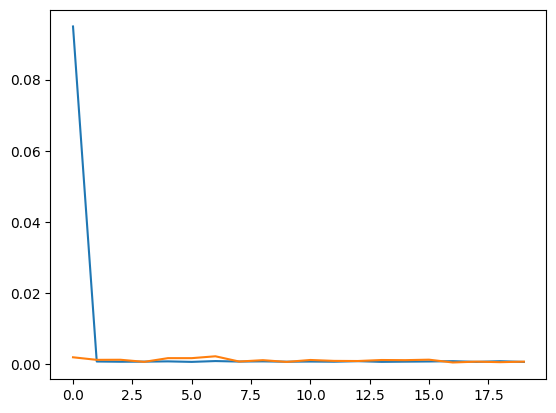

In [16]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')

65/65 [==============================] - 0s 5ms/step


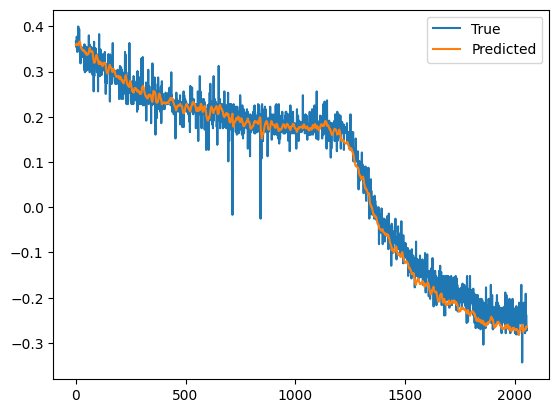

In [17]:
#plotting of model
Y_pred=model.predict(X_test)
plt.figure()
plt.plot(Y_test,label = 'True')
plt.plot(Y_pred,label = 'Predicted')
plt.legend()
plt.show()

In [18]:
#rmse and mse 
mse = np.mean((Y_test[:, 0] - Y_pred[:, 0]) ** 2)
rmse = np.sqrt(mse)
print('mse=',mse)
print('rmse=',rmse)

mse= 0.0007851002678277073
rmse= 0.028019640751224976
